<a href="https://colab.research.google.com/github/kvneswar/ml-nit/blob/master/08_ml_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

warnings.filterwarnings("ignore")

emp_df = pd.read_csv('/content/drive/MyDrive/Career/ML/NIT-Practice/ML_Practice.xlsx')

# clean up the data i.e. replace all the special chars

emp_df.Name = emp_df.Name.str.replace(r'\W', '')
emp_df.Domain = emp_df.Domain.str.replace(r'\W', '')
emp_df.Age = emp_df.Age.str.extract('(\d+)')
emp_df.Location = emp_df.Location.str.replace(r'\W', '')
emp_df.Salary = emp_df.Salary.str.replace(r'\W', '')
emp_df.Exp = emp_df.Exp.str.extract('(\d+)')

In [85]:
# fill the missing values

emp_df['Age'] = emp_df['Age'].fillna(np.mean(pd.to_numeric(emp_df['Age'])))
emp_df['Age'] = emp_df['Age'].astype(int)

emp_df['Exp'] = emp_df['Exp'].fillna(np.mean(pd.to_numeric(emp_df['Exp'])))
emp_df['Exp'] = emp_df['Exp'].astype(int)

emp_df['Salary'] = emp_df['Salary'].astype(int)

emp_df['Location'] = emp_df['Location'].fillna(emp_df['Location'].mode()[0])

# export the file to the filesystem

emp_df.to_csv('cleaned_employee_data.csv')

<Axes: xlabel='Salary', ylabel='Density'>

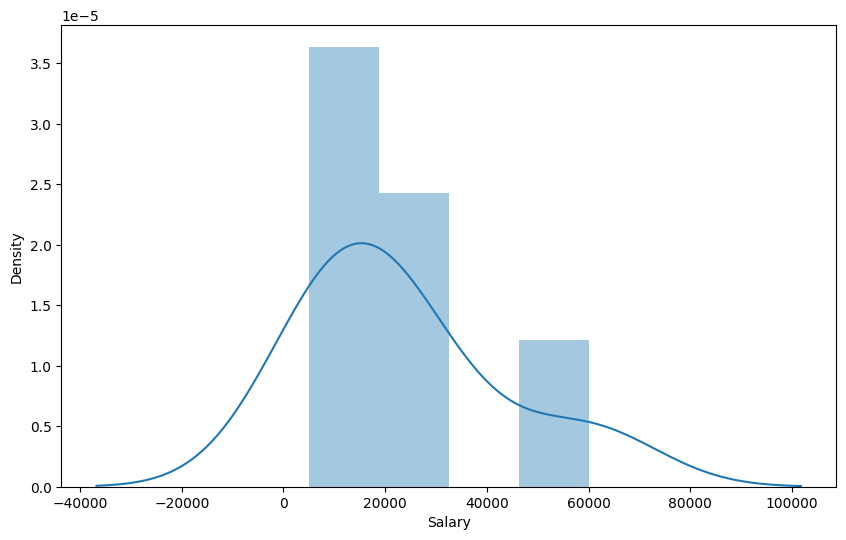

In [86]:
plt.rcParams['figure.figsize'] = 10, 6 # for the better visibility

sns.distplot(emp_df['Salary'])

<Axes: xlabel='Exp', ylabel='Density'>

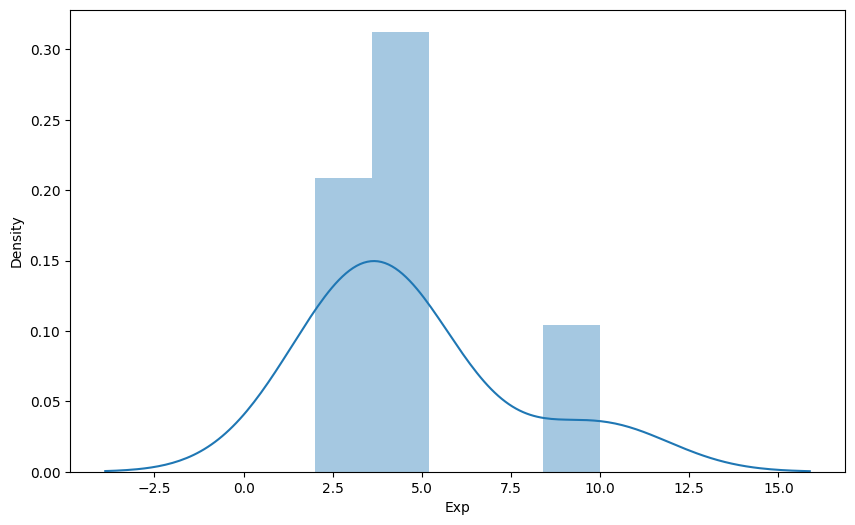

In [87]:
sns.distplot(emp_df['Exp'])

<Axes: xlabel='Exp', ylabel='Count'>

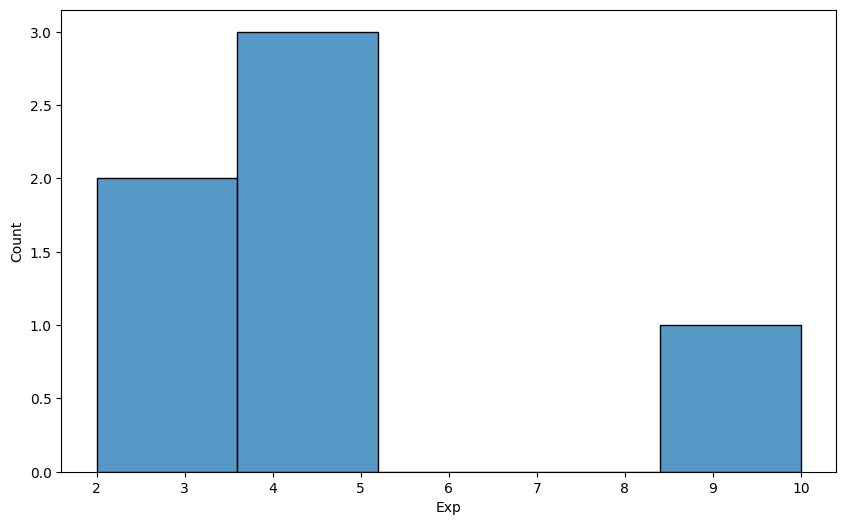

In [88]:
sns.histplot(emp_df['Exp']) # to findout the outliers, better visibility

In [89]:
print(emp_df.info())

emp_df['Name'] = emp_df['Name'].astype('category')
emp_df['Domain'] = emp_df['Domain'].astype('category')
emp_df['Location'] = emp_df['Location'].astype('category')

print(emp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int64 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int64 
 5   Exp       6 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 416.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 934.0 bytes
None


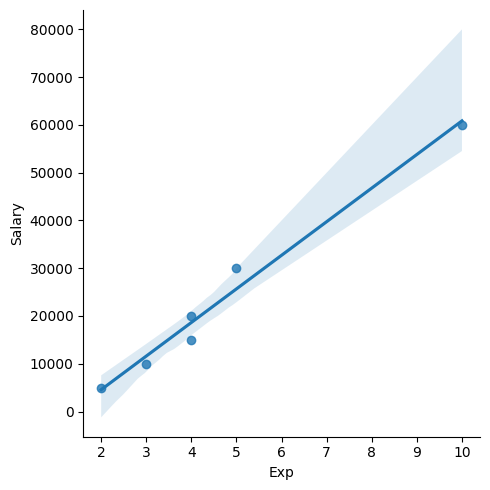

In [90]:
sns.lmplot(data=emp_df, x="Exp", y="Salary", fit_reg=True)

<Axes: xlabel='Exp', ylabel='Salary'>

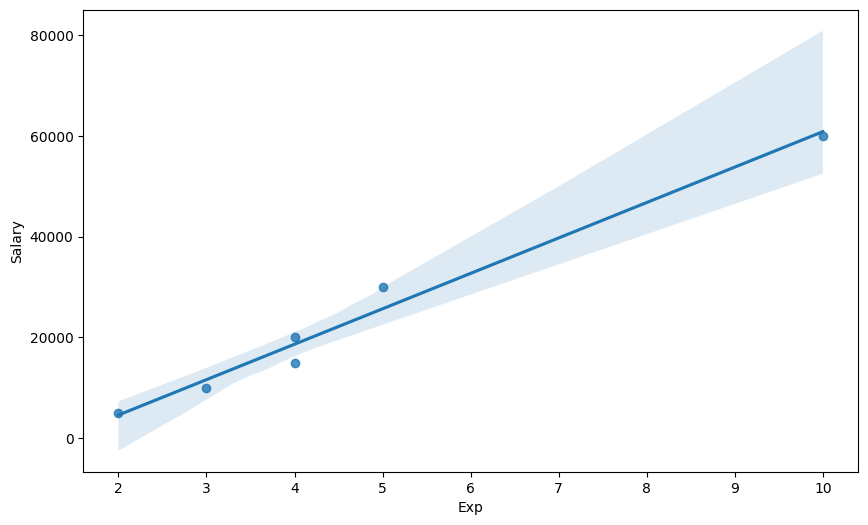

In [91]:
sns.regplot(data=emp_df, x="Exp", y="Salary", fit_reg=True)

In [92]:
emp_df[:]

# Salary is independent variable, rest of them are dependent

,Name,Domain,Age,Location,Salary,Exp
0,Mike,DataScience,34,Mumbai,5000,2
1,Teddy,Testing,45,Banglore,10000,3
2,Umar,DataAnalyst,50,Banglore,15000,4
3,Jane,Analytics,50,Hyderabad,20000,4
4,Uttam,Statistics,67,Banglore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [93]:
x_iv = emp_df.drop(['Salary'], axis = 1)

print(x_iv)

y_dv = emp_df.drop(['Name', 'Domain', 'Age', 'Location', 'Exp'], axis = 1)

print(y_dv)

    Name       Domain  Age   Location  Exp
0   Mike  DataScience   34     Mumbai    2
1  Teddy      Testing   45   Banglore    3
2   Umar  DataAnalyst   50   Banglore    4
3   Jane    Analytics   50  Hyderabad    4
4  Uttam   Statistics   67   Banglore    5
5    Kim          NLP   55      Delhi   10
   Salary
0    5000
1   10000
2   15000
3   20000
4   30000
5   60000


Imputation

In [95]:
imputation = pd.get_dummies(emp_df)

imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_DataAnalyst,Domain_DataScience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Banglore,Location_Delhi,Location_Hyderabad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
